In [2]:
import torch
import torchaudio
import os 
import io
import tempfile
import numpy as np

import boto3
import matplotlib.pyplot as plt
import requests
from botocore import UNSIGNED
from botocore.config import Config
from IPython.display import Audio
from torchaudio.utils import download_asset
import soundfile as sf



print(torch.__version__)
print(torchaudio.__version__)

1.13.0
0.13.0


<h1 style="text-align:center">Investigación Librería Torchaudi</h1>
<h3 style="text-align:center">ACUS220: Acústica Computacional con Python</h3>
<p style="text-align:center">Tomás Jesús Peñaloza Iturrieta <br>
<p style="text-align:center">Daniela Narvaez<br>
    <p style="text-align:center">08-11-2022 <br>
<a href="tomas.penaloza@alumnos.uach.cl">tomas.penaloza@alumnos.uach.cl</a><br>

# Importar Archivo

Importamos nuestro archivo de audio, que en nuestro caso es un archivo de formato FLAC. Luego veremos la metadata del mismo.

In [3]:
path = os.getcwd() #Para obtener la ruta de nuestro cuadernillo

In [4]:
au = os.listdir(path)[1] #Obtenemos de la lista de la ruta del cuadernillo, el que está en la posición [1] 
                         #(nuestro archivo de interés)

In [5]:
audio_path = os.path.join(path,au) #Se unen los datos para dar una ruta que defina nuestro archivo a analizar.


In [6]:
metadata = torchaudio.info(audio_path) #Este nos da la información de nuestro archivo de audio
print(metadata)

AudioMetaData(sample_rate=44100, num_frames=473088, num_channels=2, bits_per_sample=16, encoding=PCM_S)


In [7]:
a = torchaudio.load(audio_path) #Nos da una lista con los valores de forma de onda.
print(a)

(tensor([[ 0.0041,  0.0036,  0.0029,  ...,  0.0002,  0.0002, -0.0005],
        [ 0.0042,  0.0037,  0.0028,  ...,  0.0002,  0.0001, -0.0004]]), 44100)


# Gráficas (forma de onda y espectrograma)

Se procede a definir un plot para gráficar las forma de onda y espectrograma.

In [8]:
waveform, sample_rate = torchaudio.load(audio_path)

def plot_waveform(waveform, sample_rate):
    waveform = waveform.numpy()

    num_channels, num_frames = waveform.shape
    time_axis = torch.arange(0, num_frames) / sample_rate

    figure, axes = plt.subplots(num_channels, 1)
    if num_channels == 1:
        axes = [axes]
    for c in range(num_channels):
        axes[c].plot(time_axis, waveform[c], linewidth=1)
        axes[c].grid(True)
        if num_channels > 1:
            axes[c].set_ylabel(f"Channel {c+1}")
    figure.suptitle("waveform")
    plt.show(block=False)


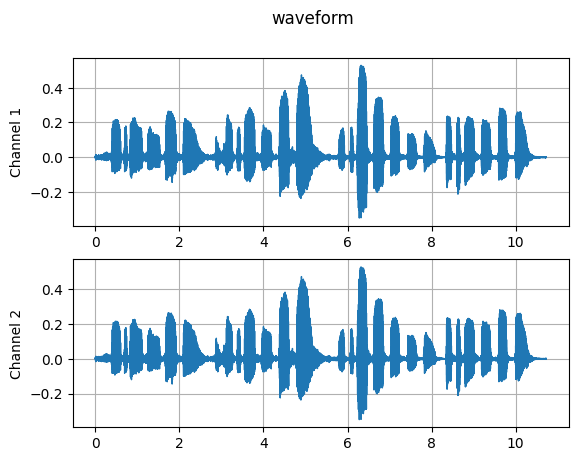

In [9]:
plot_waveform(waveform, sample_rate) #Gráfica de la forma de onda.

In [9]:
def plot_specgram(waveform, sample_rate, title="Spectrogram"):
    waveform = waveform.numpy()

    num_channels, num_frames = waveform.shape

    figure, axes = plt.subplots(num_channels, 1)
    if num_channels == 1:
        axes = [axes]
    for c in range(num_channels):
        axes[c].specgram(waveform[c], Fs=sample_rate)
        if num_channels > 1:
            axes[c].set_ylabel(f"Channel {c+1}")
    figure.suptitle(title)
    plt.show(block=False)


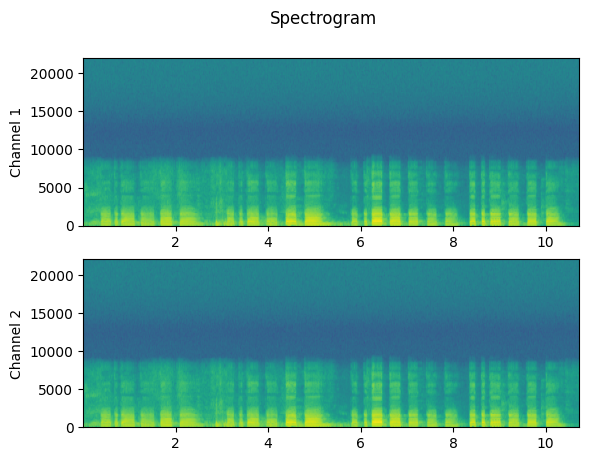

In [10]:
plot_specgram(waveform, sample_rate) #Gráfica del espectrograma del archivo.

# Muestra de audio.

Bajo esta sección mostramos el audio y procedemos a modificarlo utilizando comandos de torchaudio.

In [14]:
Audio(waveform.numpy()[0], rate=sample_rate) #Comando para escuchar el archivo de audio.

In [15]:
def inspect_file(path):
    print("-" * 10)
    print("Source:", path)
    print("-" * 10)
    print(f" - File size: {os.path.getsize(path)} bytes")
    print(f" - {torchaudio.info(path)}")
    print()

In [16]:
with tempfile.TemporaryDirectory() as tempdir:
    path = f"{tempdir}/save_example_default.wav"
    torchaudio.save(path, waveform, sample_rate)
    inspect_file(path)

----------
Source: C:\Users\Acer\AppData\Local\Temp\tmpzg7dtmm6/save_example_default.wav
----------
 - File size: 3784792 bytes
 - AudioMetaData(sample_rate=44100, num_frames=473088, num_channels=2, bits_per_sample=32, encoding=PCM_F)



Guardar el archivo sin modificar el script retornará la metadata inical del archivo de audio. Sin embargo si modificamos el script para obtener un cambio del archivo de audio obtendríamos la siguiente celda.

In [17]:
with tempfile.TemporaryDirectory() as tempdir:
    path = f"{tempdir}/save_example_PCM_S16.wav"
    torchaudio.save(path, waveform, sample_rate, encoding="PCM_S", bits_per_sample=16)
    inspect_file(path)

----------
Source: C:\Users\Acer\AppData\Local\Temp\tmpno76hosu/save_example_PCM_S16.wav
----------
 - File size: 1892396 bytes
 - AudioMetaData(sample_rate=44100, num_frames=473088, num_channels=2, bits_per_sample=16, encoding=PCM_S)



Dentro de esta celda cambiamos las propiedades de "Encoding" y "bits_per_sample", por "PCM_S" Y "16" respectivamente. Al guardarlo como 16 bits podemos apreciar que el tamaño del archivo se reduce a la mitad, sin embargo perdiendo la precisión o detalles del archivo haciendo que pierda algo de "calidad".

# Conclusión de la librería

La librería torchaudio tiene una variedad de utilizaciones, siendo una de ellas las mostradas en este cuadernillo; a base de esto podemos notar que todas van direccionadas para el análisis de audio y procesamiento de señales. 

# Bibliografía

Se utilizaron las siguientes documentaciones para el desarrollo de esta demostración.

* https://pysoundfile.readthedocs.io/en/latest/

* https://pytorch.org/audio/stable/index.html

* https://docs.python.org/3/library/os.html